In [75]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d
%matplotlib inline
gasprice=pd.read_csv("qwe.csv")
gasprices=gasprice.drop(['EEEE','CCCC','DDDD','BBBB'],axis=1)

In [76]:
type(gasprices)

pandas.core.frame.DataFrame

In [77]:
gasprices

,S.NO,DATE OF INITAL ANALYSES,DATE OF FINAL ANALSIS,MACRO REGION,STATE,KIND OF PRODUCT,NUMBER OF GAS STATION,MEASUREMENT UNIT,MEAN MARKET VALUE,MIN PRICES OBSERVED,MAX PRICES OBSERVED,MEAN PRICES MARGIN,MEAN DISTRIBUTION PRICES,DISTRIBUTION MIN PRICES,DISTRIBUTION MAX PRICES,MONTH,YEAR
0,0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,1.190,1.350,0.463,0.825,0.4201,0.9666,5,2004
1,1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.890,1.449,0.399,0.763,0.5013,1.05,5,2004
2,2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,1.180,1.760,0.419,0.97,0.5614,1.161,5,2004
3,3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,1.090,1.509,0.432,0.83,0.5991,1.22242,5,2004
4,4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,1.050,1.400,0.24,0.941,0.7441,1.0317,5,2004
5,5,2004-05-09,2004-05-15,NORDESTE,BAHIA,ETANOL HIDRATADO,408,R$/l,1.383,0.999,2.050,0.426,0.957,0.5686,1.35,5,2004
6,6,2004-05-09,2004-05-15,NORDESTE,CEARA,ETANOL HIDRATADO,278,R$/l,1.453,1.030,1.950,0.353,1.1,0.7332,1.294,5,2004
7,7,2004-05-09,2004-05-15,NORDESTE,MARANHAO,ETANOL HIDRATADO,105,R$/l,1.631,1.350,2.000,0.515,1.116,0.9923,1.36183,5,2004
8,8,2004-05-09,2004-05-15,NORDESTE,PARAIBA,ETANOL HIDRATADO,125,R$/l,1.284,1.100,1.699,0.353,0.931,0.7577,1.2972,5,2004
9,9,2004-05-09,2004-05-15,NORDESTE,PERNAMBUCO,ETANOL HIDRATADO,423,R$/l,1.224,0.989,1.700,0.277,0.947,0.5643,1.3541,5,2004


In [40]:
gasprices["STATE"].unique()

array(['DISTRITO FEDERAL', 'GOIAS', 'MATO GROSSO', 'MATO GROSSO DO SUL',
       'ALAGOAS', 'BAHIA', 'CEARA', 'MARANHAO', 'PARAIBA', 'PERNAMBUCO',
       'PIAUI', 'RIO GRANDE DO NORTE', 'SERGIPE', 'ACRE', 'AMAPA',
       'AMAZONAS', 'PARA', 'RONDONIA', 'RORAIMA', 'TOCANTINS',
       'ESPIRITO SANTO', 'MINAS GERAIS', 'RIO DE JANEIRO', 'SAO PAULO',
       'PARANA', 'RIO GRANDE DO SUL', 'SANTA CATARINA'], dtype=object)

In [41]:
df = gasprices
gasprices
df

,S.NO,DATE OF INITAL ANALYSES,DATE OF FINAL ANALSIS,MACRO REGION,STATE,KIND OF PRODUCT,NUMBER OF GAS STATION,MEASUREMENT UNIT,MEAN MARKET VALUE,MIN PRICES OBSERVED,MAX PRICES OBSERVED,MEAN PRICES MARGIN,MEAN DISTRIBUTION PRICES,DISTRIBUTION MIN PRICES,DISTRIBUTION MAX PRICES,MONTH,YEAR
0,0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,1.190,1.350,0.463,0.825,0.4201,0.9666,5,2004
1,1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.890,1.449,0.399,0.763,0.5013,1.05,5,2004
2,2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,1.180,1.760,0.419,0.97,0.5614,1.161,5,2004
3,3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,1.090,1.509,0.432,0.83,0.5991,1.22242,5,2004
4,4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,1.050,1.400,0.24,0.941,0.7441,1.0317,5,2004
5,5,2004-05-09,2004-05-15,NORDESTE,BAHIA,ETANOL HIDRATADO,408,R$/l,1.383,0.999,2.050,0.426,0.957,0.5686,1.35,5,2004
6,6,2004-05-09,2004-05-15,NORDESTE,CEARA,ETANOL HIDRATADO,278,R$/l,1.453,1.030,1.950,0.353,1.1,0.7332,1.294,5,2004
7,7,2004-05-09,2004-05-15,NORDESTE,MARANHAO,ETANOL HIDRATADO,105,R$/l,1.631,1.350,2.000,0.515,1.116,0.9923,1.36183,5,2004
8,8,2004-05-09,2004-05-15,NORDESTE,PARAIBA,ETANOL HIDRATADO,125,R$/l,1.284,1.100,1.699,0.353,0.931,0.7577,1.2972,5,2004
9,9,2004-05-09,2004-05-15,NORDESTE,PERNAMBUCO,ETANOL HIDRATADO,423,R$/l,1.224,0.989,1.700,0.277,0.947,0.5643,1.3541,5,2004


In [42]:
le=preprocessing.LabelEncoder()


In [43]:
df['STATE']=le.fit_transform(df['STATE'])

In [44]:
df.dropna(inplace=True)

In [45]:
df

,S.NO,DATE OF INITAL ANALYSES,DATE OF FINAL ANALSIS,MACRO REGION,STATE,KIND OF PRODUCT,NUMBER OF GAS STATION,MEASUREMENT UNIT,MEAN MARKET VALUE,MIN PRICES OBSERVED,MAX PRICES OBSERVED,MEAN PRICES MARGIN,MEAN DISTRIBUTION PRICES,DISTRIBUTION MIN PRICES,DISTRIBUTION MAX PRICES,MONTH,YEAR
0,0,2004-05-09,2004-05-15,CENTRO OESTE,6,ETANOL HIDRATADO,127,R$/l,1.288,1.190,1.350,0.463,0.825,0.4201,0.9666,5,2004
1,1,2004-05-09,2004-05-15,CENTRO OESTE,8,ETANOL HIDRATADO,387,R$/l,1.162,0.890,1.449,0.399,0.763,0.5013,1.05,5,2004
2,2,2004-05-09,2004-05-15,CENTRO OESTE,10,ETANOL HIDRATADO,192,R$/l,1.389,1.180,1.760,0.419,0.97,0.5614,1.161,5,2004
3,3,2004-05-09,2004-05-15,CENTRO OESTE,11,ETANOL HIDRATADO,162,R$/l,1.262,1.090,1.509,0.432,0.83,0.5991,1.22242,5,2004
4,4,2004-05-09,2004-05-15,NORDESTE,1,ETANOL HIDRATADO,103,R$/l,1.181,1.050,1.400,0.24,0.941,0.7441,1.0317,5,2004
5,5,2004-05-09,2004-05-15,NORDESTE,4,ETANOL HIDRATADO,408,R$/l,1.383,0.999,2.050,0.426,0.957,0.5686,1.35,5,2004
6,6,2004-05-09,2004-05-15,NORDESTE,5,ETANOL HIDRATADO,278,R$/l,1.453,1.030,1.950,0.353,1.1,0.7332,1.294,5,2004
7,7,2004-05-09,2004-05-15,NORDESTE,9,ETANOL HIDRATADO,105,R$/l,1.631,1.350,2.000,0.515,1.116,0.9923,1.36183,5,2004
8,8,2004-05-09,2004-05-15,NORDESTE,14,ETANOL HIDRATADO,125,R$/l,1.284,1.100,1.699,0.353,0.931,0.7577,1.2972,5,2004
9,9,2004-05-09,2004-05-15,NORDESTE,16,ETANOL HIDRATADO,423,R$/l,1.224,0.989,1.700,0.277,0.947,0.5643,1.3541,5,2004


In [46]:
df['KIND OF PRODUCT']=le.fit_transform(df['KIND OF PRODUCT'])

In [47]:
df.columns

Index(['S.NO', 'DATE OF INITAL ANALYSES', 'DATE OF FINAL ANALSIS',
       'MACRO REGION', 'STATE', 'KIND OF PRODUCT', 'NUMBER OF GAS STATION',
       'MEASUREMENT UNIT', 'MEAN MARKET VALUE', 'MIN PRICES OBSERVED',
       'MAX PRICES OBSERVED', 'MEAN PRICES MARGIN', 'MEAN DISTRIBUTION PRICES',
       'DISTRIBUTION MIN PRICES', 'DISTRIBUTION MAX PRICES', 'MONTH', 'YEAR'],
      dtype='object')

In [48]:
df.isnull().sum()

S.NO                        0
DATE OF INITAL ANALYSES     0
DATE OF FINAL ANALSIS       0
MACRO REGION                0
STATE                       0
KIND OF PRODUCT             0
NUMBER OF GAS STATION       0
MEASUREMENT UNIT            0
MEAN MARKET VALUE           0
MIN PRICES OBSERVED         0
MAX PRICES OBSERVED         0
MEAN PRICES MARGIN          0
MEAN DISTRIBUTION PRICES    0
DISTRIBUTION MIN PRICES     0
DISTRIBUTION MAX PRICES     0
MONTH                       0
YEAR                        0
dtype: int64

In [49]:
df

,S.NO,DATE OF INITAL ANALYSES,DATE OF FINAL ANALSIS,MACRO REGION,STATE,KIND OF PRODUCT,NUMBER OF GAS STATION,MEASUREMENT UNIT,MEAN MARKET VALUE,MIN PRICES OBSERVED,MAX PRICES OBSERVED,MEAN PRICES MARGIN,MEAN DISTRIBUTION PRICES,DISTRIBUTION MIN PRICES,DISTRIBUTION MAX PRICES,MONTH,YEAR
0,0,2004-05-09,2004-05-15,CENTRO OESTE,6,0,127,R$/l,1.288,1.190,1.350,0.463,0.825,0.4201,0.9666,5,2004
1,1,2004-05-09,2004-05-15,CENTRO OESTE,8,0,387,R$/l,1.162,0.890,1.449,0.399,0.763,0.5013,1.05,5,2004
2,2,2004-05-09,2004-05-15,CENTRO OESTE,10,0,192,R$/l,1.389,1.180,1.760,0.419,0.97,0.5614,1.161,5,2004
3,3,2004-05-09,2004-05-15,CENTRO OESTE,11,0,162,R$/l,1.262,1.090,1.509,0.432,0.83,0.5991,1.22242,5,2004
4,4,2004-05-09,2004-05-15,NORDESTE,1,0,103,R$/l,1.181,1.050,1.400,0.24,0.941,0.7441,1.0317,5,2004
5,5,2004-05-09,2004-05-15,NORDESTE,4,0,408,R$/l,1.383,0.999,2.050,0.426,0.957,0.5686,1.35,5,2004
6,6,2004-05-09,2004-05-15,NORDESTE,5,0,278,R$/l,1.453,1.030,1.950,0.353,1.1,0.7332,1.294,5,2004
7,7,2004-05-09,2004-05-15,NORDESTE,9,0,105,R$/l,1.631,1.350,2.000,0.515,1.116,0.9923,1.36183,5,2004
8,8,2004-05-09,2004-05-15,NORDESTE,14,0,125,R$/l,1.284,1.100,1.699,0.353,0.931,0.7577,1.2972,5,2004
9,9,2004-05-09,2004-05-15,NORDESTE,16,0,423,R$/l,1.224,0.989,1.700,0.277,0.947,0.5643,1.3541,5,2004


In [50]:
df['MACRO REGION']=le.fit_transform(df['MACRO REGION'])

In [51]:
df['YEAR']=le.fit_transform(df['YEAR'])

In [52]:
df['MONTH']=le.fit_transform(df['MONTH'])

In [53]:
df['MEASUREMENT UNIT']=le.fit_transform(df['MEASUREMENT UNIT'])

In [54]:
df['DATE OF INITAL ANALYSES']=le.fit_transform(df['DATE OF INITAL ANALYSES'])

In [55]:
df['DATE OF FINAL ANALSIS']=le.fit_transform(df['DATE OF FINAL ANALSIS'])

In [56]:
df

,S.NO,DATE OF INITAL ANALYSES,DATE OF FINAL ANALSIS,MACRO REGION,STATE,KIND OF PRODUCT,NUMBER OF GAS STATION,MEASUREMENT UNIT,MEAN MARKET VALUE,MIN PRICES OBSERVED,MAX PRICES OBSERVED,MEAN PRICES MARGIN,MEAN DISTRIBUTION PRICES,DISTRIBUTION MIN PRICES,DISTRIBUTION MAX PRICES,MONTH,YEAR
0,0,0,0,0,6,0,127,1,1.288,1.190,1.350,0.463,0.825,0.4201,0.9666,4,0
1,1,0,0,0,8,0,387,1,1.162,0.890,1.449,0.399,0.763,0.5013,1.05,4,0
2,2,0,0,0,10,0,192,1,1.389,1.180,1.760,0.419,0.97,0.5614,1.161,4,0
3,3,0,0,0,11,0,162,1,1.262,1.090,1.509,0.432,0.83,0.5991,1.22242,4,0
4,4,0,0,1,1,0,103,1,1.181,1.050,1.400,0.24,0.941,0.7441,1.0317,4,0
5,5,0,0,1,4,0,408,1,1.383,0.999,2.050,0.426,0.957,0.5686,1.35,4,0
6,6,0,0,1,5,0,278,1,1.453,1.030,1.950,0.353,1.1,0.7332,1.294,4,0
7,7,0,0,1,9,0,105,1,1.631,1.350,2.000,0.515,1.116,0.9923,1.36183,4,0
8,8,0,0,1,14,0,125,1,1.284,1.100,1.699,0.353,0.931,0.7577,1.2972,4,0
9,9,0,0,1,16,0,423,1,1.224,0.989,1.700,0.277,0.947,0.5643,1.3541,4,0


In [57]:
data2=df.corr('pearson')

In [58]:
abs(data2)

,S.NO,DATE OF INITAL ANALYSES,DATE OF FINAL ANALSIS,MACRO REGION,STATE,KIND OF PRODUCT,NUMBER OF GAS STATION,MEASUREMENT UNIT,MEAN MARKET VALUE,MIN PRICES OBSERVED,MAX PRICES OBSERVED,MONTH,YEAR
S.NO,1.000000,0.876698,0.876698,0.002384,0.002562,0.382890,0.170455,0.044301,0.122753,0.118147,0.128449,0.030138,0.874938
DATE OF INITAL ANALYSES,0.876698,1.000000,1.000000,0.003539,0.001073,0.147836,0.153042,0.013219,0.113575,0.107486,0.119811,0.022924,0.997849
DATE OF FINAL ANALSIS,0.876698,1.000000,1.000000,0.003539,0.001073,0.147836,0.153042,0.013219,0.113575,0.107486,0.119811,0.022924,0.997849
MACRO REGION,0.002384,0.003539,0.003539,1.000000,0.354050,0.010246,0.345985,0.037675,0.018711,0.030383,0.003802,0.000353,0.003552
STATE,0.002562,0.001073,0.001073,0.354050,1.000000,0.003881,0.238611,0.019482,0.007652,0.012792,0.008564,0.000365,0.001099
KIND OF PRODUCT,0.382890,0.147836,0.147836,0.010246,0.003881,1.000000,0.131393,0.149107,0.051864,0.049996,0.053375,0.007932,0.147723
NUMBER OF GAS STATION,0.170455,0.153042,0.153042,0.345985,0.238611,0.131393,1.000000,0.134493,0.002434,0.016535,0.015884,0.014040,0.151584
MEASUREMENT UNIT,0.044301,0.013219,0.013219,0.037675,0.019482,0.149107,0.134493,1.000000,0.780128,0.778482,0.774044,0.001131,0.013247
MEAN MARKET VALUE,0.122753,0.113575,0.113575,0.018711,0.007652,0.051864,0.002434,0.780128,1.000000,0.995225,0.996130,0.001093,0.113193
MIN PRICES OBSERVED,0.118147,0.107486,0.107486,0.030383,0.012792,0.049996,0.016535,0.778482,0.995225,1.000000,0.987094,0.000871,0.107112


In [59]:
x=df['DATE OF INITAL ANALYSES']
y=df['DATE OF FINAL ANALSIS']

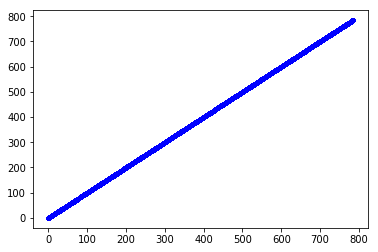

In [60]:
plt.plot(x,y,'b.')
plt.show()

In [61]:
df.corr()

,S.NO,DATE OF INITAL ANALYSES,DATE OF FINAL ANALSIS,MACRO REGION,STATE,KIND OF PRODUCT,NUMBER OF GAS STATION,MEASUREMENT UNIT,MEAN MARKET VALUE,MIN PRICES OBSERVED,MAX PRICES OBSERVED,MONTH,YEAR
S.NO,1.000000,0.876698,0.876698,0.002384,0.002562,0.382890,-0.170455,0.044301,0.122753,0.118147,0.128449,-0.030138,0.874938
DATE OF INITAL ANALYSES,0.876698,1.000000,1.000000,-0.003539,-0.001073,0.147836,-0.153042,0.013219,0.113575,0.107486,0.119811,-0.022924,0.997849
DATE OF FINAL ANALSIS,0.876698,1.000000,1.000000,-0.003539,-0.001073,0.147836,-0.153042,0.013219,0.113575,0.107486,0.119811,-0.022924,0.997849
MACRO REGION,0.002384,-0.003539,-0.003539,1.000000,0.354050,0.010246,0.345985,0.037675,-0.018711,-0.030383,-0.003802,0.000353,-0.003552
STATE,0.002562,-0.001073,-0.001073,0.354050,1.000000,0.003881,0.238611,0.019482,-0.007652,-0.012792,-0.008564,0.000365,-0.001099
KIND OF PRODUCT,0.382890,0.147836,0.147836,0.010246,0.003881,1.000000,-0.131393,0.149107,-0.051864,-0.049996,-0.053375,-0.007932,0.147723
NUMBER OF GAS STATION,-0.170455,-0.153042,-0.153042,0.345985,0.238611,-0.131393,1.000000,-0.134493,0.002434,-0.016535,0.015884,-0.014040,-0.151584
MEASUREMENT UNIT,0.044301,0.013219,0.013219,0.037675,0.019482,0.149107,-0.134493,1.000000,-0.780128,-0.778482,-0.774044,-0.001131,0.013247
MEAN MARKET VALUE,0.122753,0.113575,0.113575,-0.018711,-0.007652,-0.051864,0.002434,-0.780128,1.000000,0.995225,0.996130,-0.001093,0.113193
MIN PRICES OBSERVED,0.118147,0.107486,0.107486,-0.030383,-0.012792,-0.049996,-0.016535,-0.778482,0.995225,1.000000,0.987094,-0.000871,0.107112


In [62]:
abs(df.corr())

,S.NO,DATE OF INITAL ANALYSES,DATE OF FINAL ANALSIS,MACRO REGION,STATE,KIND OF PRODUCT,NUMBER OF GAS STATION,MEASUREMENT UNIT,MEAN MARKET VALUE,MIN PRICES OBSERVED,MAX PRICES OBSERVED,MONTH,YEAR
S.NO,1.000000,0.876698,0.876698,0.002384,0.002562,0.382890,0.170455,0.044301,0.122753,0.118147,0.128449,0.030138,0.874938
DATE OF INITAL ANALYSES,0.876698,1.000000,1.000000,0.003539,0.001073,0.147836,0.153042,0.013219,0.113575,0.107486,0.119811,0.022924,0.997849
DATE OF FINAL ANALSIS,0.876698,1.000000,1.000000,0.003539,0.001073,0.147836,0.153042,0.013219,0.113575,0.107486,0.119811,0.022924,0.997849
MACRO REGION,0.002384,0.003539,0.003539,1.000000,0.354050,0.010246,0.345985,0.037675,0.018711,0.030383,0.003802,0.000353,0.003552
STATE,0.002562,0.001073,0.001073,0.354050,1.000000,0.003881,0.238611,0.019482,0.007652,0.012792,0.008564,0.000365,0.001099
KIND OF PRODUCT,0.382890,0.147836,0.147836,0.010246,0.003881,1.000000,0.131393,0.149107,0.051864,0.049996,0.053375,0.007932,0.147723
NUMBER OF GAS STATION,0.170455,0.153042,0.153042,0.345985,0.238611,0.131393,1.000000,0.134493,0.002434,0.016535,0.015884,0.014040,0.151584
MEASUREMENT UNIT,0.044301,0.013219,0.013219,0.037675,0.019482,0.149107,0.134493,1.000000,0.780128,0.778482,0.774044,0.001131,0.013247
MEAN MARKET VALUE,0.122753,0.113575,0.113575,0.018711,0.007652,0.051864,0.002434,0.780128,1.000000,0.995225,0.996130,0.001093,0.113193
MIN PRICES OBSERVED,0.118147,0.107486,0.107486,0.030383,0.012792,0.049996,0.016535,0.778482,0.995225,1.000000,0.987094,0.000871,0.107112


In [63]:
abs(data2['MEASUREMENT UNIT']).sort_values()

MONTH                      0.001131
DATE OF INITAL ANALYSES    0.013219
DATE OF FINAL ANALSIS      0.013219
YEAR                       0.013247
STATE                      0.019482
MACRO REGION               0.037675
S.NO                       0.044301
NUMBER OF GAS STATION      0.134493
KIND OF PRODUCT            0.149107
MAX PRICES OBSERVED        0.774044
MIN PRICES OBSERVED        0.778482
MEAN MARKET VALUE          0.780128
MEASUREMENT UNIT           1.000000
Name: MEASUREMENT UNIT, dtype: float64

In [64]:
X1=data2["MAX PRICES OBSERVED"]
X2=data2["MEASUREMENT UNIT"]
Y=data2["MIN PRICES OBSERVED"]

In [65]:
X1 = np.array((X1 - X1.min())-(X1.max() - X1.min()))
X2 = np.array((X2 - X2.min())-(X2.max() - X2.min()))
Y = np.array((Y - Y.min())-(Y.max() - Y.min()))

In [66]:
x1_train, x1_test, x2_train, x2_test, y_train, y_test = train_test_split(X1, X2, Y, test_size=0.2)

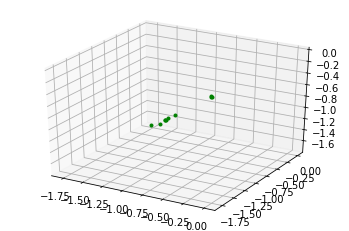

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x1_train, x2_train, y_train, 'g.')

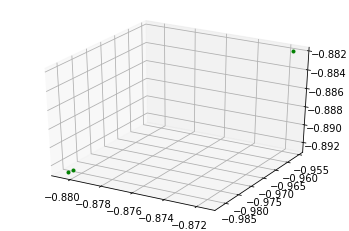

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x1_test, x2_test, y_test, 'g.')

In [69]:
def hypothesis(a,b,c,x1,x2):
    return a * x1 + b * x2 + c

In [70]:
def error(a,b,c,x1,x2,y):
    e = 0
    m = len(x1)
    for i in range(m):
        e += np.power((hypothesis(a,b,c,x1[i],x2[i]) - y[i]), 2)
    
    return (1/(2*m)) * e

In [71]:
def step_gradient(a,b,c,x1,x2,y,learning_rate):
    grad_a = 0
    grad_b = 0
    grad_c = 0
    m = len(x1)
    for i in range(m):
        grad_a += 2/m * (hypothesis(a,b,c,x1[i],x2[i]) - y[i]) * x1[i]
        grad_b += 2/m * (hypothesis(a,b,c,x1[i],x2[i]) - y[i]) * x2[i]
        grad_c += 2/m * (hypothesis(a,b,c,x1[i],x2[i]) - y[i])
        
    a = a - (grad_a * learning_rate)
    b = b - (grad_b * learning_rate)
    c = c - (grad_c * learning_rate)
    
    return a, b, c

In [72]:
def descend(initial_a, initial_b, initial_c, x1, x2, y, learning_rate, iterations):
    a = initial_a
    b = initial_b
    c = initial_c
    for i in range(iterations):
        e = error(a, b, c, x1, x2, y)
        if i % 1000 == 0:
            print(f"Error: {e}, a: {a}, b: {b}, c: {c}")
        
        a, b, c = step_gradient(a, b, c, x1, x2, y, learning_rate)

    return a, b, c

In [73]:
a = 0
b = 1
c = 1
learning_rate = 0.01
iterations = 10000

final_a, final_b, final_c = descend(a, b, c, x1_train, x2_train, y_train, learning_rate, iterations)

Error: 0.7874257093698703, a: 0, b: 1, c: 1
Error: 0.0005178982445967655, a: 1.331970002845993, b: 0.34970887023461045, c: 0.6431797980406144
Error: 0.000481500466090709, a: 1.3210241378520924, b: 0.33798101106389616, c: 0.6214885472823636
Error: 0.00044799542548524347, a: 1.3105075720197557, b: 0.32673952031810066, c: 0.6006787011352728
Error: 0.0004171531349229732, a: 1.3004175482179927, b: 0.31595397421335747, c: 0.5807128831900108
Error: 0.0003887619773557017, a: 1.290736766482492, b: 0.30560587991848404, c: 0.5615568604197758
Error: 0.0003626271536018651, a: 1.2814486283322128, b: 0.295677494791234, c: 0.5431777882785912
Error: 0.00033856934577822245, a: 1.272537208505204, b: 0.2861517958145789, c: 0.5255441543649907
Error: 0.0003164234869528237, a: 1.2639872276534678, b: 0.27701245040937417, c: 0.5086257243914769
Error: 0.0002960376285774496, a: 1.2557840261452697, b: 0.2682437884308295, c: 0.4923934903453768


In [74]:
print(error(a, b, c, x1_train, x2_train, y_train))
print(error(final_a, final_b, final_c, x1_train, x2_train, y_train))
print(error(final_a, final_b, final_c, x1_test, x2_test, y_test))

0.7874257093698703
0.00027727189792879024
0.00015612944872125795
